### count the number of TV shows and movies separately and compare between them (which is more).

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("netflix_titles.csv")

In [4]:
type_counts = df['type'].value_counts()
print("num of movies:", type_counts.get('Movie', 0))
print("num of tv shows:", type_counts.get('TV Show', 0))


num of movies: 6131
num of tv shows: 2676


In [5]:
if type_counts['Movie'] > type_counts.get('TV Show'):
    print("there're more movies than tv shows")
elif type_counts['Movie'] < type_counts.get('TV Show'):
    print("there're more tv shows than movies")
else: 
    print("movies and tv shows are the same num") 

there're more movies than tv shows


2- iterate through the rating column of the dataset and count how many times the rating is (TV-MA).

In [6]:
rate = 0
for rating in df['rating']:
    if rating == 'TV-MA' :
        rate += 1
print("num of TV-MA rating:", rate)


num of TV-MA rating: 3207


3- filter the dataset to only include movies released after 2015.

In [7]:
filtered_df = df[(df['type'] == 'Movie') & (df['release_year'] > 2015)]
print(filtered_df.head())
print("num of movies after 2015:", filtered_df.shape[0])

   show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   
13     s14  Movie  Confessions of an Invisible Girl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
9                  Theodore Melfi   
12            Christian Schwochow   
13                  Bruno Garotti   

                                                 cast  \
0                                                 NaN   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
13  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   

                    country          date_added  release_year rating duration  \
0             United S

4-Create a new column called year_added from the date_added column.

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
print(df[['date_added', 'year_added']].head()) 

  date_added  year_added
0 2021-09-25      2021.0
1 2021-09-24      2021.0
2 2021-09-24      2021.0
3 2021-09-24      2021.0
4 2021-09-24      2021.0


-For each year_added, calculate the average length of the title (character count).


In [9]:
df['title_length'] = df['title'].str.len()
avg_title_length = df.groupby('year_added')['title_length'].mean()
print(avg_title_length)


year_added
2008.0    17.500000
2009.0    15.500000
2010.0    27.000000
2011.0    20.769231
2012.0    23.666667
2013.0    19.300000
2014.0    23.173913
2015.0    24.246575
2016.0    19.930622
2017.0    17.752577
2018.0    17.521231
2019.0    17.370685
2020.0    17.456869
2021.0    17.838451
Name: title_length, dtype: float64


-Plot the trend of average title length over the years Netflix added content.

In [10]:
import matplotlib.pyplot as plt

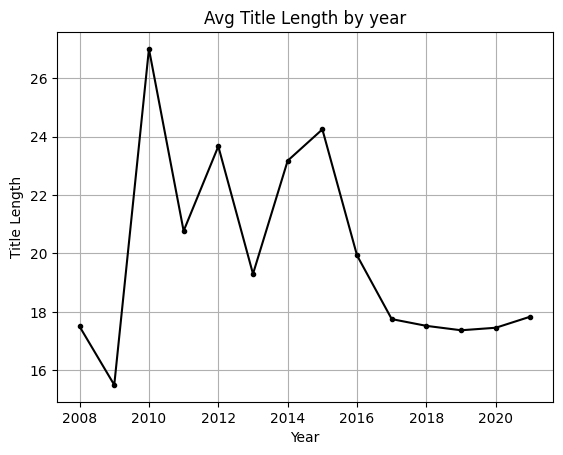

In [11]:
avg_title_length.plot(kind='line', marker='.', color='black')

plt.title('Avg Title Length by year')
plt.xlabel('Year')
plt.ylabel('Title Length')
plt.grid(True)
plt.show()







1- Extract the month and year separately.

In [2]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month_name()
print(df[['date_added', 'month_added']].head()) 

  date_added month_added
0 2021-09-25   September
1 2021-09-24   September
2 2021-09-24   September
3 2021-09-24   September
4 2021-09-24   September


C:\Users\AR Store\AppData\Local\Temp\ipykernel_12376\2252343132.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


 2-Identify which month (across all years) Netflix typically adds the most new content.


In [4]:
month_counts = df['month_added'].value_counts()
print(month_counts)
print("Most active month:", month_counts.idxmax())

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64
Most active month: July


 3- Plot the total number of titles added per month.

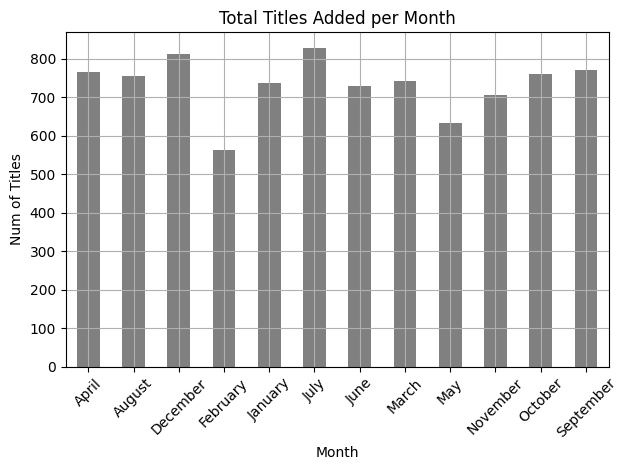

In [5]:
month_counts = df['month_added'].value_counts().sort_index()

import matplotlib.pyplot as plt

month_counts.plot(kind='bar', color='grey')  
plt.title('Total Titles Added per Month')
plt.xlabel('Month')
plt.ylabel('Num of Titles')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()  
plt.show()

1- Identify any titles that appear more than once, regardless of country.

Step 1: get duplicated titles

In [6]:
duplicate_titles = df[df.duplicated('title', keep=False)]

Step 2: show title + country + rating for duplicates

In [7]:
result = duplicate_titles[['title', 'country', 'rating']].sort_values('title')
print(result)

       title                         country rating
3962  15-Aug                           India  TV-14
5966  15-Aug                           India  TV-14
4522  22-Jul  Norway, Iceland, United States      R
5965  22-Jul  Norway, Iceland, United States      R
3996   9-Feb                             NaN  TV-14
5964   9-Feb                             NaN  TV-14
